# Procedure - B Behaviour of LCD

- *Luis Miguel Sánchez Brea*
- *16 de junio de 2020*

Simulation of the LCD at a Spatial Light Modulator. 

The LCD parameters are imported from slm.LCD_models

we provide an array with the gray levels and it returns a (2,2,255)  $M_0(gl)$ Jones matrix.

The angles of the polarized are provided by a npz file. We simulate amplitude and phase configurations.

## Load

In [19]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [20]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

In [21]:
from slm import np, sp, plt, um, mm, degrees
from slm.LCD_models import LCD_kopin, LCD_sony
from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl
from slm.utils import rotation

In [22]:
best_amplitude_angles_kopin=np.load('best_amplitude_angles_kopin.npz')
best_amplitude_angles_kopin=best_amplitude_angles_kopin['angles']
print(best_amplitude_angles_kopin/degrees)

best_phase_angles_kopin=np.load('best_phase_angles_kopin.npz')
best_phase_angles_kopin=best_phase_angles_kopin['angles']
print(best_phase_angles_kopin/degrees)

[127.02439883  57.92425749 147.96711836  37.25893434]
[ 52.04937572  67.03487887 109.02981302  28.22204403]


## incident field

In [23]:
v0=[1/np.sqrt(2),-1j/np.sqrt(2)]

In [24]:
source = Jones_vector()
source.from_matrix(v0);
source.M

array([[ 0.70710678+0.j        ],
       [-0.        -0.70710678j]])

## SLM

In [25]:
LCD_model = LCD_kopin  # LCD_kopin, LCD_sony
best_amplitude_angles=best_amplitude_angles_kopin
best_phase_angles=best_phase_angles_kopin

gl=LCD_model['gl']
num_gl = len(gl)


In [26]:
LCD_experiment = LCD_jones_matrices(LCD_model)

In [27]:
LCD_jones = LCD_experiment.DC_to_pypol(
    filename="results/procedure - B Jones_matrices _{}.npz".format(LCD_model['name']))
print(LCD_jones.M.shape)

(2, 2, 256)


In [28]:
print(LCD_jones[0], LCD_jones[255])

SLM_picked = 
[+0.374-0.094j -0.636+0.669j ]   
[+0.692+0.611j +0.380+0.061j ]   
 SLM_picked = 
[+0.963-0.271j +0.010+0.009j ]   
[-0.004+0.013j +0.963-0.268j ]   



## polarizers

In [29]:
pol1 = Jones_matrix('m1')
pol1.diattenuator_linear(p1=1, p2=0, azimuth=0* degrees, length=num_gl)

pol2 = Jones_matrix('m2')
pol2.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=num_gl)

pol3 = Jones_matrix('m3')
pol3.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=num_gl)

pol4 = Jones_matrix('m4')
pol4.diattenuator_linear(p1=1, p2=0, azimuth=0, length=num_gl)

polarizers=(pol1, pol2, pol3, pol4)

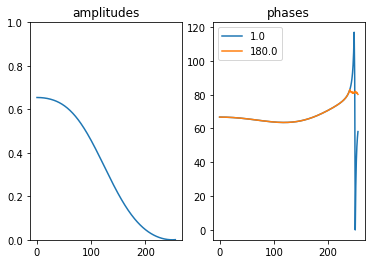

In [30]:
SLM_Jones_amplitude, amplitudes, phases=get_fields_gl(polarizers, LCD_jones, source, 
                                         angles=best_amplitude_angles, gl=gl,
                                        has_draw=True)

(0.0, 1.0)

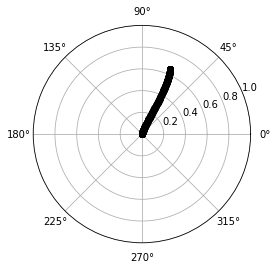

In [31]:
plt.polar(phases, amplitudes, 'ko')
plt.ylim(0,1)

(0.0, 180.0)

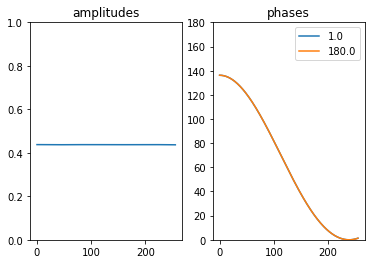

In [32]:
SLM_Jones_phase, amplitudes, phases=get_fields_gl(polarizers, LCD_jones, source, 
                                         angles=best_phase_angles, gl=gl,
                                        has_draw=True)
plt.ylim(0,180)

(0.0, 1.0)

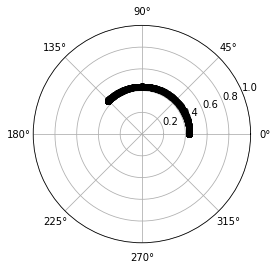

In [33]:
plt.polar(phases, amplitudes, 'ko')
plt.ylim(0,1)

## Other parameters

The retardance of SLM is (deg.):
The mean value is 68.19987518715408 +- 48.1752503376548


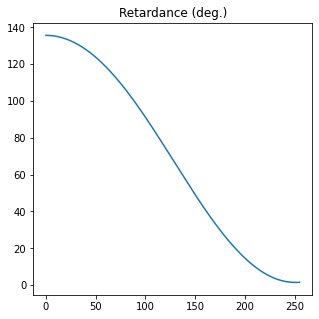

In [34]:
LCD_jones.parameters.retardance(draw=True);

The global phase of SLM is (deg.):
The mean value is 341.77400427706516 +- 2.5511887940333264


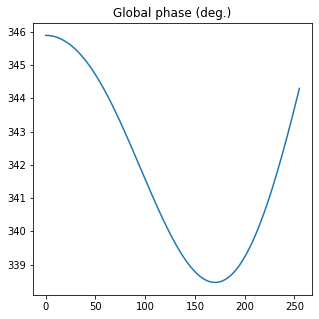

In [35]:
LCD_jones.parameters.global_phase(draw=True);